In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,accuracy_score,classification_report,recall_score,fbeta_score,precision_score

In [77]:
X,y = make_classification(n_features=6 , n_samples=2000, n_classes=2, random_state=42)

In [78]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)

<h1>Logistic Regression</h1>

In [79]:
from sklearn.linear_model import LogisticRegression

classifier2 = LogisticRegression()
classifier2.fit(X_train, y_train)

#training Data performance
y_log_train_pred = classifier2.predict(X_train)
y_log_train_pred_prob = classifier2.predict_proba(X_train)[:,1]

In [80]:
y_log_train_pred

array([1, 1, 1, ..., 0, 1, 1])

In [81]:
y_log_train_pred_prob

array([0.99945504, 0.95717061, 0.81786536, ..., 0.27933725, 0.96120395,
       0.99870815])

In [82]:
print(confusion_matrix(y_train,y_log_train_pred))
print(classification_report(y_train,y_log_train_pred))
print('Accuracy ===',accuracy_score(y_train,y_log_train_pred))
print('Recall Value ===', recall_score(y_train,y_log_train_pred))
print('Precision Value / Sensitivity ===', precision_score(y_train,y_log_train_pred))

[[588  84]
 [ 65 663]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       672
           1       0.89      0.91      0.90       728

    accuracy                           0.89      1400
   macro avg       0.89      0.89      0.89      1400
weighted avg       0.89      0.89      0.89      1400

Accuracy === 0.8935714285714286
Recall Value === 0.9107142857142857
Precision Value / Sensitivity === 0.8875502008032129


In [83]:
precision, recall, thresholds = precision_recall_curve(y_train,y_log_train_pred_prob)
print(precision)
print(recall)
print(thresholds)

[0.52       0.52037169 0.52074392 ... 1.         1.         1.        ]
[1.         1.         1.         ... 0.00274725 0.00137363 0.        ]
[6.17658695e-06 1.24545603e-05 4.97301341e-05 ... 9.99884070e-01
 9.99914295e-01 9.99953253e-01]


In [84]:
# Find the threshold that maximizes precision (reduce false positives)
optimal_threshold = thresholds[np.argmax(precision)]
print(f'Optimal threshold based on Precision: {optimal_threshold}')

Optimal threshold based on Precision: 0.9955800506172255


In [85]:
y_optimal_log_pred = (y_log_train_pred_prob >= optimal_threshold).astype(int)

In [86]:
y_optimal_log_pred

array([1, 0, 0, ..., 0, 0, 1])

In [87]:
print(classification_report(y_train, y_optimal_log_pred))
print(confusion_matrix(y_train, y_optimal_log_pred))
print(accuracy_score(y_train, y_optimal_log_pred))
print(precision_score(y_train, y_optimal_log_pred))
print(recall_score(y_train, y_optimal_log_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       672
           1       1.00      0.10      0.19       728

    accuracy                           0.53      1400
   macro avg       0.75      0.55      0.43      1400
weighted avg       0.76      0.53      0.42      1400

[[672   0]
 [652  76]]
0.5342857142857143
1.0
0.1043956043956044


In [88]:
fpr,tpr,thresholds_roc = roc_curve(y_train,y_log_train_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'Area under ROC curve :{roc_auc}')

Area under ROC curve :0.9551915718210361


In [90]:
print(fpr)
print(tpr)
print(thresholds_roc)

[0.         0.         0.         0.0014881  0.0014881  0.00297619
 0.00297619 0.00446429 0.00446429 0.00595238 0.00595238 0.00744048
 0.00744048 0.01041667 0.01041667 0.01190476 0.01190476 0.01488095
 0.01488095 0.01636905 0.01636905 0.01785714 0.01785714 0.01934524
 0.01934524 0.02083333 0.02083333 0.02232143 0.02232143 0.02380952
 0.02380952 0.02529762 0.02529762 0.02678571 0.02678571 0.02827381
 0.02827381 0.0297619  0.0297619  0.03125    0.03125    0.0327381
 0.0327381  0.03422619 0.03422619 0.03571429 0.03571429 0.03720238
 0.03720238 0.04017857 0.04017857 0.04315476 0.04315476 0.04464286
 0.04464286 0.04613095 0.04613095 0.04761905 0.04761905 0.05208333
 0.05208333 0.05357143 0.05357143 0.05654762 0.05654762 0.05952381
 0.05952381 0.0639881  0.0639881  0.06547619 0.06547619 0.06696429
 0.06696429 0.06845238 0.06845238 0.06994048 0.06994048 0.07142857
 0.07142857 0.07291667 0.07291667 0.07440476 0.07440476 0.07589286
 0.07589286 0.07738095 0.07738095 0.08184524 0.08184524 0.08779

In [ ]:
optim_threshold = thresholds_roc(np.argmax[])

IndexError: index 1324 is out of bounds for axis 0 with size 218

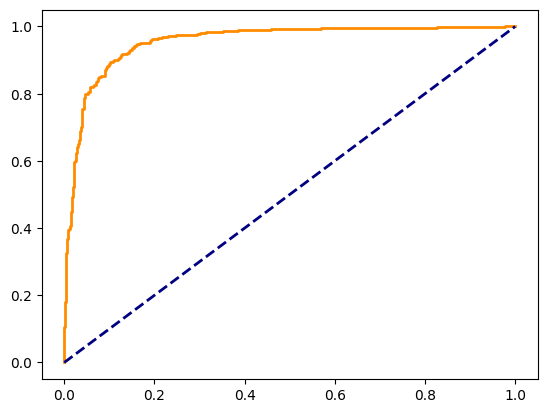

In [89]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([fpr[np.argmax(precision)]], [tpr[np.argmax(precision)]], marker='o', color='red', label='Optimal Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


<h1>Decision Tree</h1>

In [ ]:
# Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

classifier1 = DecisionTreeClassifier(max_depth= 8)
classifier1.fit(X_train,y_train)

#Training Data Performance
y_train_pred = classifier1.predict(X_train)
y_train_pred_prob = classifier1.predict_proba(X_train)

In [ ]:
# Evaluation Metrics
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))

[[646  26]
 [ 17 711]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       672
           1       0.96      0.98      0.97       728

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400

0.9692857142857143
